# File Datesets

Explore the use of the Azure ML File Dataset to mount the dataset to compute instance.

## Import libraries
To install OpenCV, open terminal and run the following: 

```bash
conda env list
conda activate azureml_py38_PT_TF
pip install opencv-python
```

In [1]:
import os
from glob import glob
import random
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


from azureml.core import Workspace
from azureml.core import Datastore, Dataset 

In [2]:
mount_point = '/mnt/tmp/cats_dogs'

## Mount a File Dataset
retrieve the dataset from the Azure ML service by name using: 

```python
    Dataset.get_by_name(workspace, <datasetname>)
```

In [5]:
ws = Workspace.from_config()
ds = Dataset.get_by_name(ws, 'catsanddogsv1')
print(type(ds))

<class 'azureml.data.file_dataset.FileDataset'>


In [6]:
!ls /mnt/tmp -l

total 1688
-rw-r----- 1 root      root      1681218 Aug 19 02:17 10e511004cae46237916a29b58af8ef1bff158ea92e43b02edf0b20f23d25c38
drwx------ 2 root      root         4096 Aug 19 07:14 20230819_071413-scantem.5792057d5e
drwxrwxrwx 3 azureuser azureuser    4096 Aug 19 01:17 azureml-logs
drwx------ 2 azureuser azureuser    4096 Aug 19 06:53 azureml_artifactsyJ1jGe
prwx------ 1 azureuser azureuser       0 Aug 19 01:17 clr-debug-pipe-5013-6177-in
prwx------ 1 azureuser azureuser       0 Aug 19 01:17 clr-debug-pipe-5013-6177-out
prwx------ 1 azureuser azureuser       0 Aug 19 07:14 clr-debug-pipe-90654-2144157-in
prwx------ 1 azureuser azureuser       0 Aug 19 07:14 clr-debug-pipe-90654-2144157-out
srw------- 1 azureuser azureuser       0 Aug 19 01:17 dotnet-diagnostic-5013-6177-socket
srw------- 1 azureuser azureuser       0 Aug 19 07:14 dotnet-diagnostic-90654-2144157-socket
drwx------ 2 azureuser azureuser    4096 Aug 19 06:57 pyright-81326-BQ5eVAeEiVuJ
drwx------ 2 azureuser azureuser   

File datasets can be mounted to compute instances using the `mount` method, which takes a `mount_point` parameter. Then the mount can be started using the `start` method. 


In [7]:
ds_mount = ds.mount(mount_point)
ds_mount.start()

In [8]:
print(ds_mount.mount_point)
print(os.listdir(ds_mount.mount_point))

/mnt/tmp/cats_dogs
['train', 'validation', 'vectorize.py']
['train', 'validation', 'vectorize.py']


In [9]:
!ls /mnt/tmp/cats_dogs -l

total 0
dr-xr-xr-x 2 root root   0 Aug 19 07:14 train
dr-xr-xr-x 2 root root   0 Aug 19 07:14 validation
-r-xr-xr-x 1 root root 140 Aug 19 06:48 vectorize.py


## Plot images from Dataset
Retrieve list of files from mount_point, and plot them as images: 

In [10]:
cats = glob(mount_point + '/train/*/cat.*.jpg')
dogs = glob(mount_point + '/train/*/dog.*.jpg')


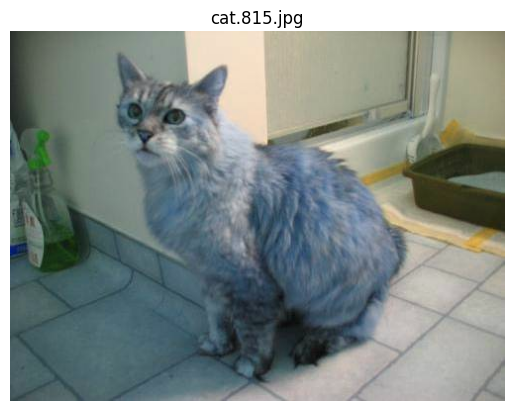

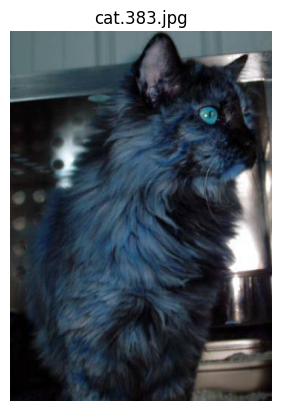

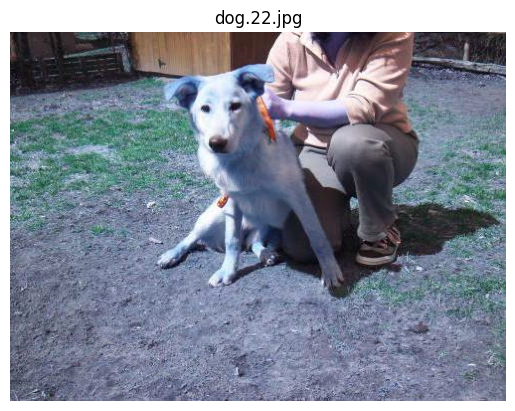

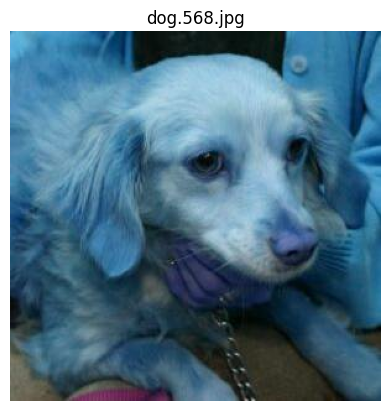

In [11]:
cats_and_dogs = random.sample(cats, 2) + random.sample(dogs, 2)
for fn in cats_and_dogs: 
    img = cv2.imread(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fn.split('/')[-1])
    plt.show()